<a href="https://colab.research.google.com/github/sadia-aly/LSTM/blob/main/Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saaddar1/time-series-dataset-for-growth-forcasting")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'time-series-dataset-for-growth-forcasting' dataset.
Path to dataset files: /kaggle/input/time-series-dataset-for-growth-forcasting


In [ ]:
import os
file_path = os.path.join(path, "Totals.csv")
df.head(12)

,Date,Views
0,2022-07-04,4
1,2022-07-05,11
2,2022-07-06,6
3,2022-07-07,11
4,2022-07-08,6
5,2022-07-09,11
6,2022-07-10,8
7,2022-07-11,7
8,2022-07-12,11
9,2022-07-13,8


In [ ]:
import os
os.path.join("https://www.kaggle.com/datasets/saaddar1/time-series-dataset-for-growth-forcasting,Totals.csv")

'https://www.kaggle.com/datasets/saaddar1/time-series-dataset-for-growth-forcasting,Totals.csv'

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Views   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


In [ ]:
print(df.describe())

            Views
count  365.000000
mean     7.312329
std      3.558149
min      0.000000
25%      5.000000
50%      7.000000
75%     10.000000
max     29.000000


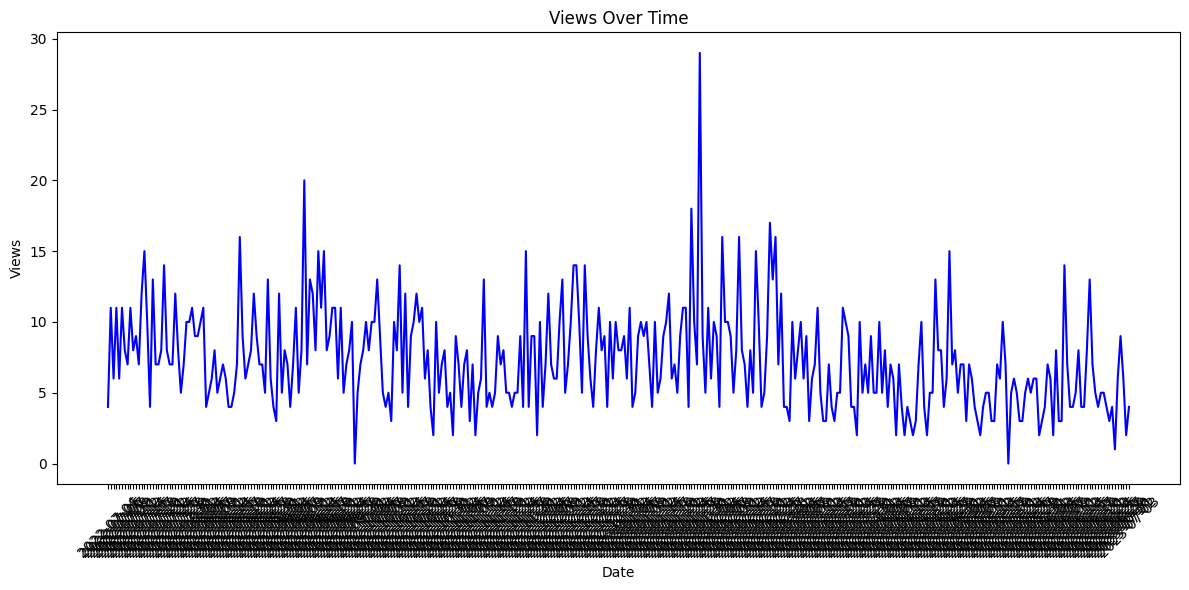

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Views'], label='Views', color='blue')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Views Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

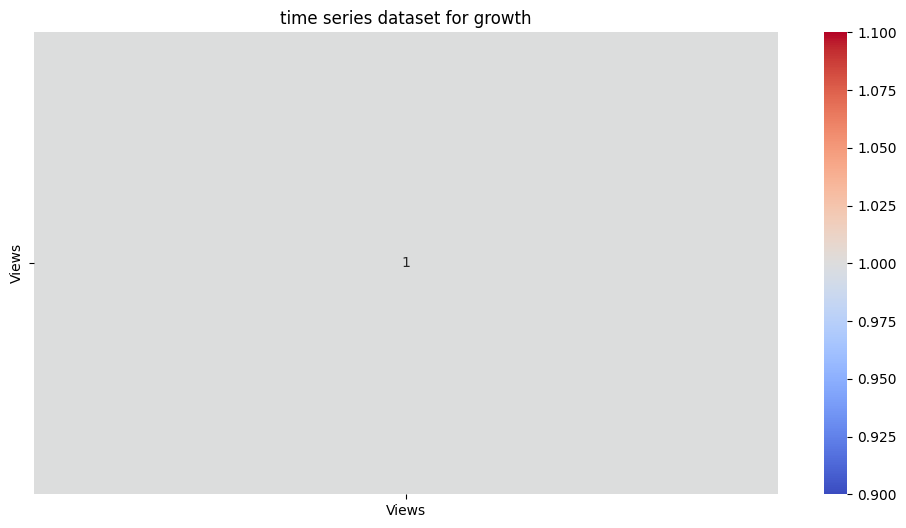

In [ ]:
plt.figure(figsize=(12,6))
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('time series dataset for growth')
plt.show()

In [ ]:
data = df['Views'].values.reshape(-1,1)

In [ ]:
# Scale data to [0,1] range for LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Step 5: Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0146 - val_loss: 0.0104
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0144 - val_loss: 0.0098
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0148 - val_loss: 0.0105
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0161 - val_loss: 0.0098
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0151 - val_loss: 0.0101
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0153 - val_loss: 0.0098
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0132 - val_loss: 0.0102
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0175 - val_loss: 0.0099
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0138 - val_loss: 0.0096
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0162 - val_loss: 0.0112
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0151 - val_loss: 0.0097
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0177 - val_loss: 0.0096
E

In [ ]:

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
train_pred = scaler.inverse_transform(train_pred)
y_train_actual = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 3.6084710279455017
Test RMSE: 2.863123465854097


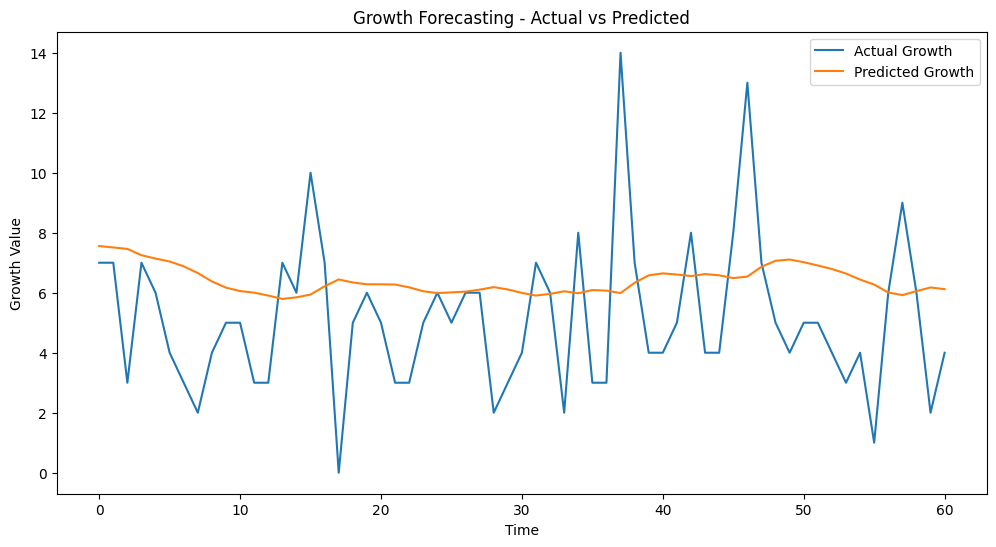

In [ ]:
# Step 8: Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Growth')
plt.plot(test_pred, label='Predicted Growth')
plt.title('Growth Forecasting - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Growth Value')
plt.legend()
plt.show()

In [ ]:
# Step 9: Forecast future values (optional)
# For example, forecast next 30 timesteps
last_seq = scaled_data[-seq_length:]
forecast = []
current_seq = last_seq.reshape(1, seq_length, 1)
for _ in range(30):
    pred = model.predict(current_seq)[0]
    forecast.append(pred)
    current_seq = np.append(current_seq[:,1:,:], [[pred]], axis=1)

forecast_actual = scaler.inverse_transform(forecast)
print('30-step future forecast:', forecast_actual.flatten())
# Notes:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━